Please run those two cells before running the Notebook!

As those plotting settings are standard throughout the book, we do not show them in the book every time we plot something.

In [1]:
# %matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from pandas.errors import SettingWithCopyWarning  # Updated import location
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# feel free to modify, for example, change the context to "notebook"
sns.set_theme(context="talk", style="whitegrid",
    palette="colorblind", color_codes=True,
    rc={"figure.figsize": [12, 8]})

## 几点说明

1. 运行代码过程中，建议多查看帮助文件，以便了解函数的其他用法和选项。
2. 可以在 Jupyter Notebook 右侧打开一个交互窗口，来查看函数的帮助文件。这样就无需新增代码单元格了。
   - 按快捷键 **Ctrl+Shift+P**，打开命令面板, 输入 `Jupyter: Create Interactive Window` 即可打开交互窗口。
   - 在交互窗口中输入 `help(yfinance.download)` 即可查看 **yfinance** 库中的 `download()` 函数的帮助文件。这等价于输入 `yfinance.download?`。若输入 `yfinance.download??`，会显示更为详细的帮助信息。

# 1. 获取金融数据

## 1.1 从雅虎财经获取数据

本节介绍如何从 Yahoo Finance 获取数据。我们将使用 Python 的 pandas 库来处理数据，并使用 matplotlib 库来可视化数据。我们还将介绍如何使用 pandas 的 DataReader 模块从 Yahoo Finance 获取数据。

先看一个简单的例子：下载苹果公司 (AAPL) 的股票数据。

第一种方式是使用 **yfinance** 库中的 `download()` 函数。只需指定股票代码和时间范围即可。



In [36]:
# 1. Import the libraries
import pandas as pd 
import yfinance as yf

# 2. Download the data
df = yf.download("AAPL", 
                 start="1980-12-01", 
                 end="2025-04-29",
                 progress=False)

# 3. Inspect the data:
print(f"Downloaded {len(df)} rows of data.")
print(f"Data columns: {[col[0] for col in df.columns]}")
df.tail(5)

Downloaded 11184 rows of data.
Data columns: ['Close', 'High', 'Low', 'Open', 'Volume']


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-04-22,199.740005,201.589996,195.970001,196.119995,52976400
2025-04-23,204.600006,208.000000,202.800003,206.000000,52929200
2025-04-24,208.369995,208.830002,202.940002,204.889999,47311000
2025-04-25,209.279999,209.750000,206.199997,206.369995,38222300
2025-04-28,210.139999,211.500000,207.460007,210.000000,38743100


### yfinance.download() 函数

输入 `yfinance.download??` 可以看到该函数有多种灵活的选项。下面是一些常用的选项：

- 限定数据的时间范围：`start` 和 `end`。
  - 也可以用 `period` 来指定时间范围，例如 `period='1y'` 表示过去一年。
- 数据的频率：`interval`。
  - 例如 `interval='1d'` 表示每天的数据，`interval='1m'` 表示每分钟的数据。
- 数据的类型：`actions`。
  - 例如 `actions=True` 表示获取股票的分红和拆分数据。 
- 数据的格式：`auto_adjust`。
  - 表示自动调整数据，例如拆分和分红。默认值是 `True`。
- `multi_level_index`：变量名独立出现还是与股票代码成对出现。
  - 表示是否使用多级索引。默认值是 `True`，此时数据中的变量名和股票代码会成对出现，如收盘价会表示为 `('Close', 'AAPL')`。对于一次性下载多支股票数据的情况，这个选项非常有用。然而， 但我们只想研究一只股票时，使用 `multi_level_index=False` 会更方便。此时收盘价会标记为 `Close`。

下面的例子便采用了一些新的设定方法来下载贵州茅台 (600519.SS) 的过去 10 年的股票交易数据。

In [2]:
import yfinance as yf
import pandas as pd

df_maotai = yf.download("600519.SS",
                        period="10y",
                        interval="1d",
                        rounding=True,
                        auto_adjust=True,
                        multi_level_index=False)

df_maotai.head(5)
df_maotai.tail(5)

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2025-04-23,1552.00,1559.22,1545.00,1559.0,1866876
2025-04-24,1552.25,1560.68,1548.98,1552.0,1487181
2025-04-25,1550.00,1561.20,1550.00,1557.1,1476490
2025-04-28,1550.00,1555.00,1546.60,1552.0,1465972
2025-04-29,1544.00,1552.54,1532.02,1550.0,1892180


### 小知识点：`yfinance` 股票代码格式

在使用 `yfinance` 下载股票数据时，股票代码的填写规则取决于所属交易所。以下美股、港股和沪深股股票代码的格式说明和典型示例。

- **[美股](https://finance.yahoo.com/lookup/)**：直接使用股票代码  
  - 示例：'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'GM', 'AMZN', 'NVDA', 'BABA', 'JD'
- **港股**：4 位股票代码 + 后缀 '.HK'（不足补零）  
  - 示例：'0005.HK', '0941.HK', '1299.HK'
- **沪股**（上海交易所）：股票代码 + 后缀 '.SS'  
  - 示例：'600519.SS', '601398.SS', '600036.SS'
- **深股**（深圳交易所）：6 股票代码 + 后缀 '.SZ' (不足补零)  
  - 示例：'000001.SZ', '002415.SZ', '300750.SZ'

- **其他交易所**：其他交易所的代码可以在 Yahoo Finance 上找到，参见：<https://finance.yahoo.com/lookup/>
  - 例如：
    - 伦敦证券交易所：`LON:VOD`，`LON:BP`。
    - 法兰克福证券交易所：`FRA:BMW`，`FRA:DAI`。
    - 东京证券交易所：`TYO:7203.T`，`TYO:6758.T`。

### 完整股票代码

- 全球主要交易所中的完整股票代码列表
  - 在线查看：[eoddata.com/symbols](https://www.eoddata.com/symbols.aspx)
  - Python 包：[pytickersymbols](https://github.com/portfolioplus/pytickersymbols)
- 美股完整股票代码可以在 [plextock.com/us-symbols](https://plextock.com/us-symbols) 网站直接下载。
- [深交所股票列表](https://www.szse.cn/market/product/stock/list/index.html)，或 [wiki-深交所主板上市公司列表](https://zh.wikipedia.org/wiki/%E6%B7%B1%E5%9C%B3%E8%AF%81%E5%88%B8%E4%BA%A4%E6%98%93%E6%89%80%E4%B8%BB%E6%9D%BF%E4%B8%8A%E5%B8%82%E5%85%AC%E5%8F%B8%E5%88%97%E8%A1%A8)
- [wiki-上海证券交易所主板上市公司列表](https://zh.wikipedia.org/wiki/%E4%B8%8A%E6%B5%B7%E8%AF%81%E5%88%B8%E4%BA%A4%E6%98%93%E6%89%80%E4%B8%BB%E6%9D%BF%E4%B8%8A%E5%B8%82%E5%85%AC%E5%8F%B8%E5%88%97%E8%A1%A8)
- [香港证券交易所上市公司列表](https://zh.wikipedia.org/wiki/%E9%A6%99%E6%B8%AF%E8%AF%81%E5%88%B8%E4%BA%A4%E6%98%93%E6%89%80%E4%B8%8A%E5%B8%82%E5%85%AC%E5%8F%B8%E5%88%97%E8%A1%A8)

### 股票指数

- 股票指数的代码格式与股票类似，例如：
    - **上证指数**：`000001.SS`，**深证成指**：`399001.SZ`。
    - **道琼斯工业平均指数**：`^DJI`，**纳斯达克综合指数**：`^IXIC`。
- 其他指数的代码可以在 Yahoo Finance 上找到，参见：
    - [全球指数列表](https://finance.yahoo.com/markets/world-indices/)
- 示例：
    - `^GSPC`：标准普尔500指数  
    - `^IXIC`：纳斯达克综合指数  
    - `^DJI`：道琼斯工业平均指数  
    - `^FTSE`：英国富时100指数  
    - `^N225`：日经225指数


第二种方式是使用 **yfinance** 库中的 `Ticker()` 函数。只需指定股票代码即可。

```python

We can also use the `Ticker` class to download the historical prices and much more.

In [3]:
# instantiate the Ticker class
data = yf.Ticker("AAPL")
# view the available attributes and methods
list(data.info.items())[1:10]

[('city', 'Cupertino'),
 ('state', 'CA'),
 ('zip', '95014'),
 ('country', 'United States'),
 ('phone', '(408) 996-1010'),
 ('website', 'https://www.apple.com'),
 ('industry', 'Consumer Electronics'),
 ('industryKey', 'consumer-electronics'),
 ('industryDisp', 'Consumer Electronics')]

我们可以从这个字典中读取我们感兴趣的信息。比如，我们可以获取 Apple 公司的网址：

In [4]:
website = data.info['website']
print(f'website: {website}')

website: https://www.apple.com


说明：完整的属性和方法列表非常长，因此这里只展示前 10 个。如果想要查看完整列表，可以使用如下命令：
```python
data.info()
```

In [5]:
# get the last month of historical prices
data.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-03-31 00:00:00-04:00,217.009995,225.619995,216.229996,222.130005,65299300,0.0,0.0
2025-04-01 00:00:00-04:00,219.809998,223.679993,218.899994,223.190002,36412700,0.0,0.0
2025-04-02 00:00:00-04:00,221.320007,225.190002,221.020004,223.889999,35905900,0.0,0.0
2025-04-03 00:00:00-04:00,205.539993,207.490005,201.250000,203.190002,103419000,0.0,0.0
2025-04-04 00:00:00-04:00,193.889999,199.880005,187.339996,188.380005,125910900,0.0,0.0
2025-04-07 00:00:00-04:00,177.199997,194.149994,174.619995,181.460007,160466300,0.0,0.0
2025-04-08 00:00:00-04:00,186.699997,190.339996,169.210007,172.419998,120859500,0.0,0.0
2025-04-09 00:00:00-04:00,171.949997,200.610001,171.889999,198.850006,184395900,0.0,0.0
2025-04-10 00:00:00-04:00,189.070007,194.779999,183.000000,190.419998,121880000,0.0,0.0


## 股票分拆

In [6]:
# get stock's split history, 样本区间：从公司创立到现在

div_splits = data.splits
print(div_splits)

Date
1987-06-16 00:00:00-04:00    2.0
2000-06-21 00:00:00-04:00    2.0
2005-02-28 00:00:00-05:00    2.0
2014-06-09 00:00:00-04:00    7.0
2020-08-31 00:00:00-04:00    4.0
Name: Stock Splits, dtype: float64


### 可视化：股价走势 + 股票分拆时点

接下来，我们将使用 `plotly` 库来可视化股价走势和股票分拆时点。我们将创建一个包含股价走势和股票分拆时点的图表。我们将使用 `plotly.graph_objects` 模块来创建图表，并使用 `plotly.subplots` 模块来创建子图。我们将使用 `make_subplots` 函数来创建子图，并使用 `add_trace` 方法来添加数据。最后，我们将使用 `show` 方法来显示图表。

乔布斯于 1997 年再次回归苹果公司，并于 2000 年 1 月 1 日开始担任 CEO。2000 年 1 月 1 日，苹果公司进行了 2:1 的股票分拆。为此，我们将图形的时间起始时点设置为 1997 年。这样，可以让图形展示的信息更为集中。 

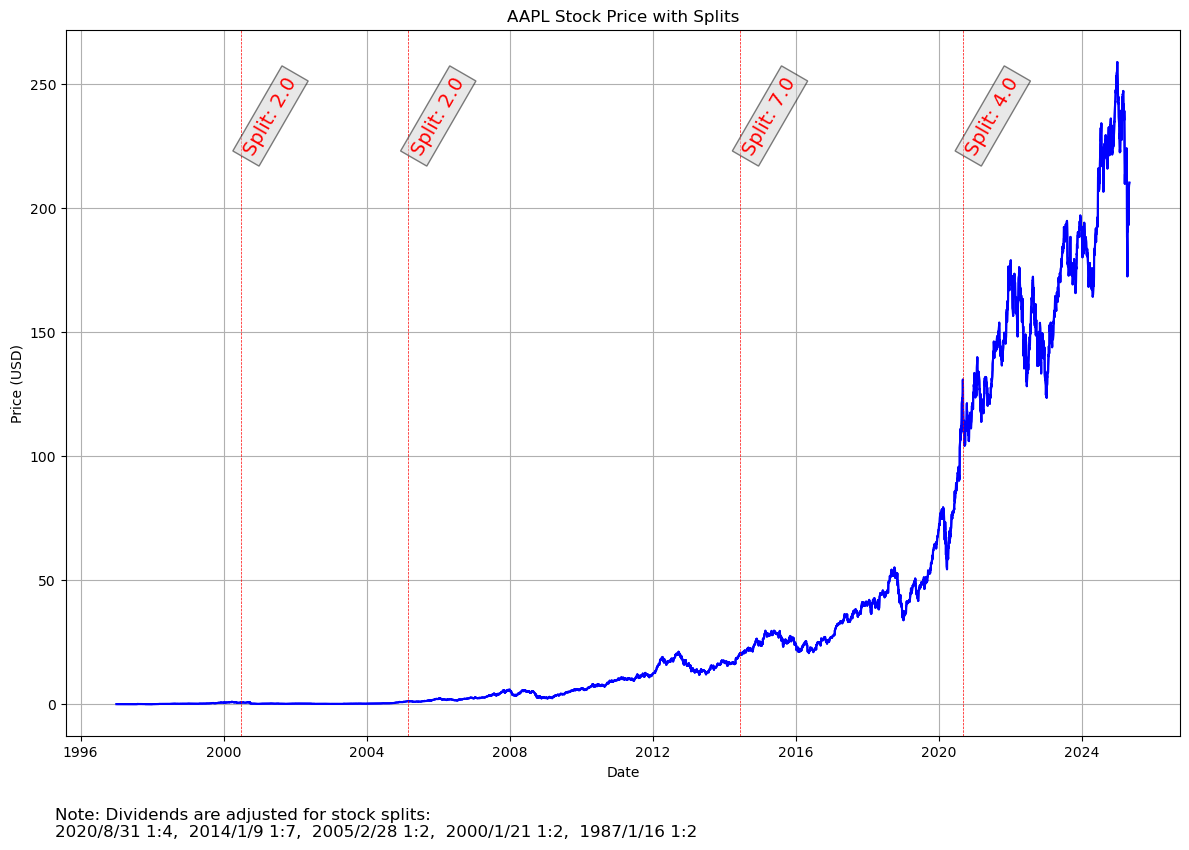

In [32]:
# 绘制 '股价时序图' + '用文字标注分拆时点'
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import pandas as pd
import warnings
from pandas.errors import SettingWithCopyWarning  # Updated import location
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

df = yf.download("AAPL", 
                 start="1980-12-01", 
                 end="2025-04-29",
                 progress=False)
# Note: 'df_Af1997' means "df_After_1997"
plt.figure(figsize=(12, 8))
df_Af1997 = df[df.index >= "1997-01-01"]  # 只保留1997年以后的数据
plt.plot(df_Af1997.index, df_Af1997['Close'], 
         label='AAPL', color='blue')
plt.title('AAPL Stock Price with Splits (After 1997)')
plt.plot(df_Af1997.index, df_Af1997['Close'], label='AAPL', color='blue')
plt.title('AAPL Stock Price with Splits')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid()
plt.legend().set_visible(False)
plt.tight_layout()
div_splits_Af1997 = div_splits[div_splits.index >= "1997-01-01"]
for date, split in div_splits_Af1997.items():
    plt.axvline(x=date, color='red', 
                linestyle='--', linewidth=0.5, 
                label=f'Split: {split}')
    plt.text(date, df_Af1997['Close'].max() * 0.85, 
             f'Split: {split}', rotation=60, 
             verticalalignment='bottom', 
             color='red', fontsize=14, 
             bbox=dict(facecolor='lightgrey', alpha=0.5))

# 添加底部注释
note = ("Note: Dividends are adjusted for stock splits:\n"
    "2020/8/31 1:4,  2014/1/9 1:7,  2005/2/28 1:2,  "
    "2000/1/21 1:2,  1987/1/16 1:2")
plt.figtext(0.05, -0.05, note, fontsize=12, ha='left', wrap=True)
plt.tight_layout()
plt.show()

## 现金股利

我们先列表呈现苹果公司在 1980-2025 年期间的现金股利数据，然后通过图形来展示现金股利的变化趋势。

### 可视化：现金股利各年度变化趋势

In [16]:

# 各个年度的分红总额
div_year = data.dividends.resample('Y').sum()
# Filter out years with dividends > 0
div_year_filtered = div_year[div_year > 0]

print(div_year_filtered)

# Add a note
print("\nNote: Only years with dividends > 0 are shown.")

Date
1987-12-31 00:00:00-05:00    0.001786
1988-12-31 00:00:00-05:00    0.003035
1989-12-31 00:00:00-05:00    0.003661
1990-12-31 00:00:00-05:00    0.004017
1991-12-31 00:00:00-05:00    0.004284
1992-12-31 00:00:00-05:00    0.004284
1993-12-31 00:00:00-05:00    0.004284
1994-12-31 00:00:00-05:00    0.004284
1995-12-31 00:00:00-05:00    0.004284
2012-12-31 00:00:00-05:00    0.189286
2013-12-31 00:00:00-05:00    0.421430
2014-12-31 00:00:00-05:00    0.461429
2015-12-31 00:00:00-05:00    0.507500
2016-12-31 00:00:00-05:00    0.557500
2017-12-31 00:00:00-05:00    0.615000
2018-12-31 00:00:00-05:00    0.705000
2019-12-31 00:00:00-05:00    0.760000
2020-12-31 00:00:00-05:00    0.807500
2021-12-31 00:00:00-05:00    0.865000
2022-12-31 00:00:00-05:00    0.910000
2023-12-31 00:00:00-05:00    0.950000
2024-12-31 00:00:00-05:00    0.990000
2025-12-31 00:00:00-05:00    0.250000
Name: Dividends, dtype: float64

Note: Only years with dividends > 0 are shown.


### 美化显示结果

为了让列表展示的结果更美观，这里做了两个处理：

其一，将年份变量 (Year) 设置为索引变量 (index)，并将其格式化为整数型 (int)，具体做法是：

```python
div_year_df['Year'] = div_year_df['Year'].dt.year
```

此处，`df['Year'].dt.year` 是 Pandas 库的一个方法，用于将日期格式转换为年份格式。其中，`xx.dt` 是 Pandas 库的一个**属性**，用于访问日期时间数据的属性和方法；而 `xx.dt.year` 是一个**方法**，用于提取日期时间数据的年份部分。

其二，将股利数据的显示格式设置为固定格式，统一显示小数点后四位数字，具体做法是：

```python
div_year_df['Dividend'] = div_year_df['Dividend'].map(lambda x: f"{x:.4f}")
```

In [15]:
# Create a DataFrame for better presentation
div_year_df = div_year_filtered.reset_index()
div_year_df.columns = ['Year', 'Dividend']
div_year_df['Year'] = div_year_df['Year'].dt.year  # Convert to 4-digit year format

# Adjust the display format of dividends to 4 significant digits
div_year_df['Dividend'] = div_year_df['Dividend'].map(lambda x: f"{x:.4f}")

# Display the table
print(div_year_df)

# Add a note
print("\nNote: Only years with dividends > 0 are shown.")

    Year Dividend
0   1987   0.0018
1   1988   0.0030
2   1989   0.0037
3   1990   0.0040
4   1991   0.0043
5   1992   0.0043
6   1993   0.0043
7   1994   0.0043
8   1995   0.0043
9   2012   0.1893
10  2013   0.4214
11  2014   0.4614
12  2015   0.5075
13  2016   0.5575
14  2017   0.6150
15  2018   0.7050
16  2019   0.7600
17  2020   0.8075
18  2021   0.8650
19  2022   0.9100
20  2023   0.9500
21  2024   0.9900
22  2025   0.2500

Note: Only years with dividends > 0 are shown.


我们可以进一步绘制苹果公司历年股票现金分红的时序图：


<Axes: title={'center': 'AAPL Dividends History'}, xlabel='Date'>

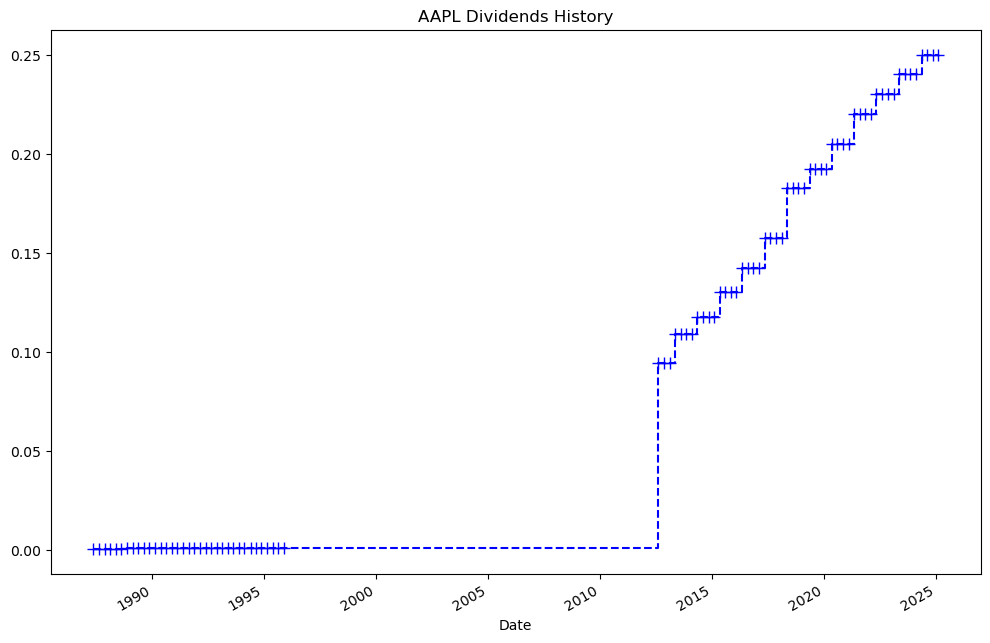

In [29]:
# graph the stock's dividends payments history
data.dividends.plot(title="AAPL Dividends History", 
                    figsize=(12, 8), 
                    drawstyle='steps-post', 
                    marker='+', 
                    linestyle='--', 
                    color='blue', 
                    markersize=8)

### 作业：如何美化图形，传达更多信息？

1. x 轴如何改进？
2. 添加网格线？

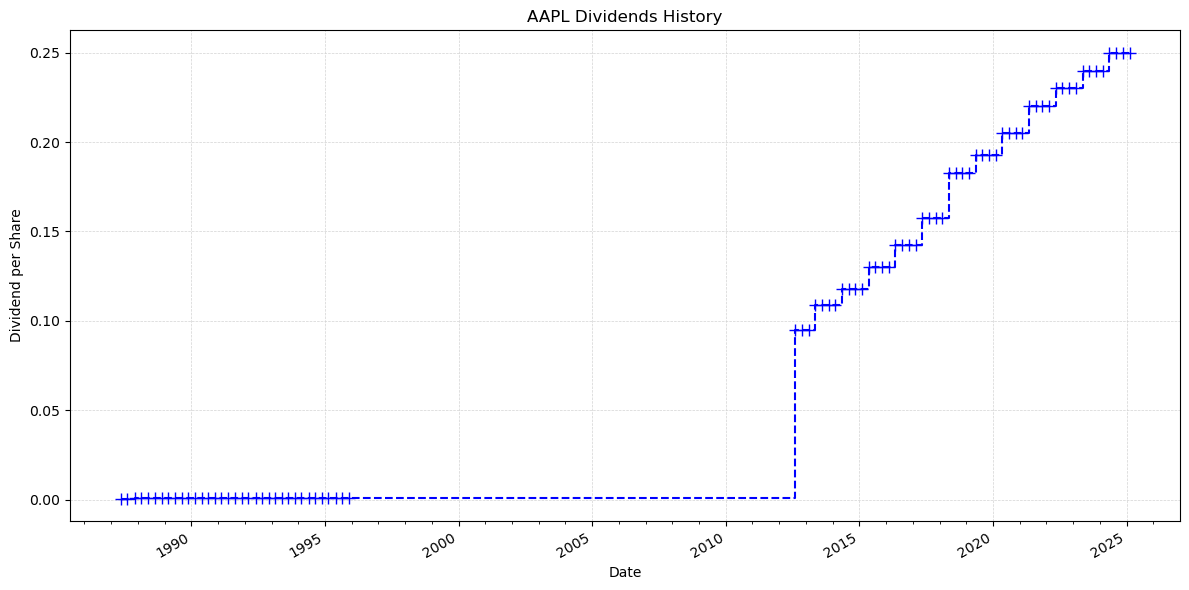

In [28]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# 假设你已有的数据对象是 data.dividends
fig, ax = plt.subplots(figsize=(12, 6))

# 绘制股息历史
data.dividends.plot(
    title="AAPL Dividends History", 
    drawstyle='steps-post', 
    marker='+', 
    linestyle='--', 
    color='blue', 
    markersize=8,
    ax=ax
)

# 主刻度：每 5 年
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# 小刻度：每年一个（添加 mini-ticks）
ax.xaxis.set_minor_locator(mdates.YearLocator(1))

# 网格和标签
ax.grid(color='lightgrey', linestyle='--', linewidth=0.5)
ax.set_xlabel("Date")
ax.set_ylabel("Dividend per Share")

# 显示图形
plt.tight_layout()
plt.show()


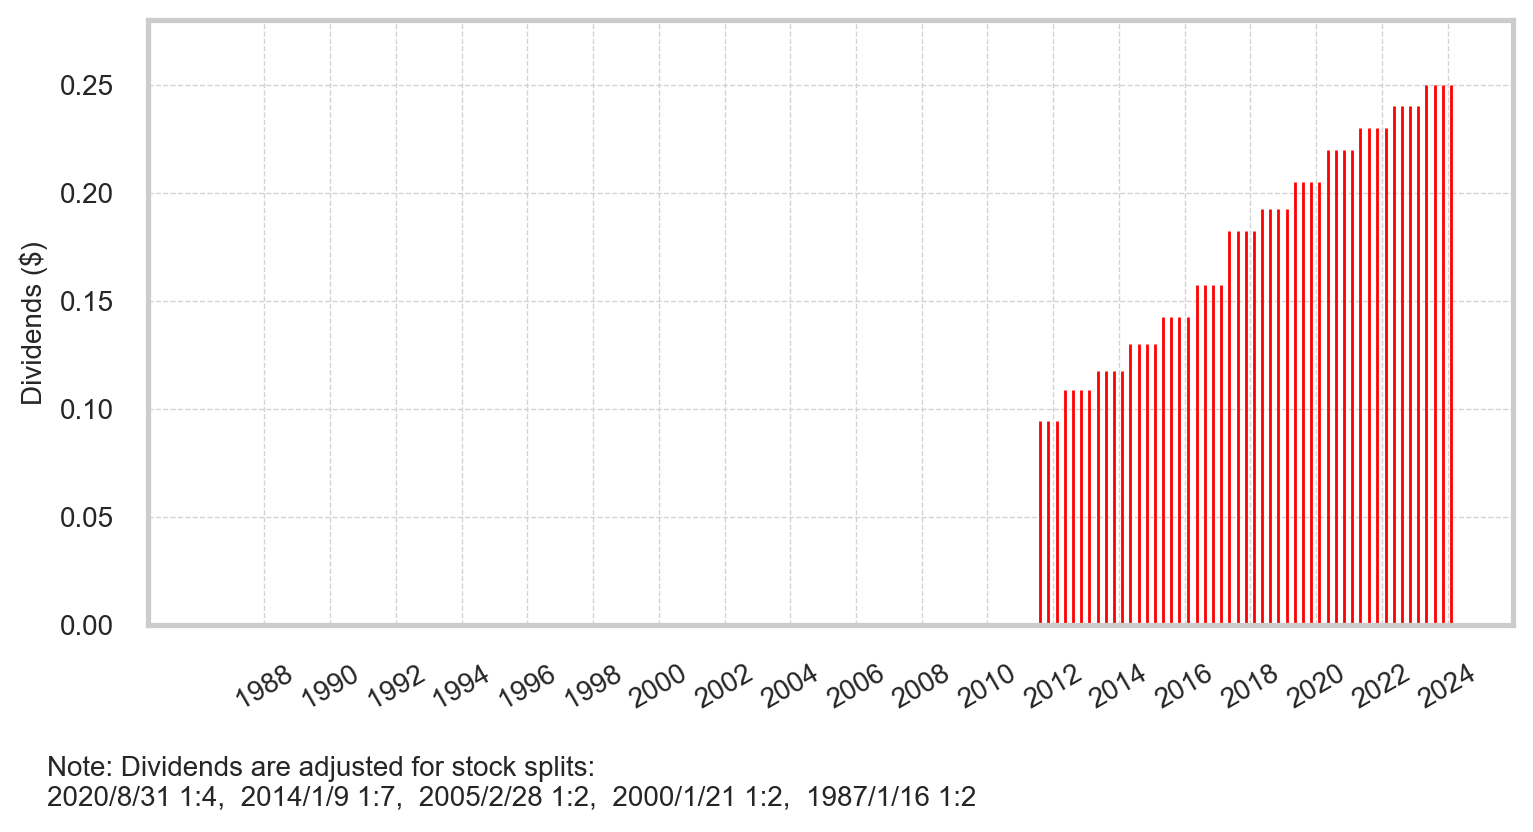

In [120]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# 下载 AAPL 历史数据（含分红）
ticker = yf.Ticker("AAPL")
dividends = ticker.dividends

# 创建图形
fig, ax = plt.subplots(figsize=(8, 4))

# 绘制柱状图
ax.vlines(dividends.index, 0, dividends.values, 
          colors="red", linewidth=1)

# 设置 y 轴标签
ax.set_ylabel("Dividends ($)", fontsize=10)
plt.yticks(fontsize=10)
ax.set_ylim(0, 0.28)     # 设置坐标轴范围
# 设置 x 轴标签
year_range = pd.date_range(start="1988", end="2025", freq="2Y")
ax.set_xticks(year_range)
ax.set_xticklabels([year.year for year in year_range], 
                   rotation=30, ha='center', fontsize=10)
# 淡色网格线
ax.grid(color='lightgrey', linestyle='--', linewidth=0.5)

# 添加底部注释
note = ("Note: Dividends are adjusted for stock splits:\n"
        "2020/8/31 1:4,  2014/1/9 1:7,  2005/2/28 1:2,  "
        "2000/1/21 1:2,  1987/1/16 1:2")
plt.figtext(0.05, -0.05, note, fontsize=10, ha='left')



# 美化图像
plt.tight_layout()
plt.show()


In [ ]:
# get stock's repurchase history
aapl_data.shares.repurchase

In [40]:
# show corporate actions
aapl_data.actions

,Dividends,Stock Splits
Date,,


In [41]:
# show financials
aapl_data.financials

,2021-09-25,2020-09-26,2019-09-28,2018-09-29
Research Development,21914000000.0,18752000000.0,16217000000.0,14236000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,109207000000.0,67091000000.0,65737000000.0,72903000000.0
Minority Interest,None,None,None,None
Net Income,94680000000.0,57411000000.0,55256000000.0,59531000000.0
Selling General Administrative,21973000000.0,19916000000.0,18245000000.0,16705000000.0
Gross Profit,152836000000.0,104956000000.0,98392000000.0,101839000000.0
Ebit,108949000000.0,66288000000.0,63930000000.0,70898000000.0
Operating Income,108949000000.0,66288000000.0,63930000000.0,70898000000.0
Other Operating Expenses,None,None,None,None


In [42]:
# show quarterly financials
aapl_data.quarterly_financials

,2021-12-25,2021-09-25,2021-06-26,2021-03-27
Research Development,6306000000.0,5772000000.0,5717000000.0,5262000000.0
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,41241000000.0,23248000000.0,24369000000.0,28011000000.0
Minority Interest,None,None,None,None
Net Income,34630000000.0,20551000000.0,21744000000.0,23630000000.0
Selling General Administrative,6449000000.0,5616000000.0,5412000000.0,5314000000.0
Gross Profit,54243000000.0,35174000000.0,35255000000.0,38079000000.0
Ebit,41488000000.0,23786000000.0,24126000000.0,27503000000.0
Operating Income,41488000000.0,23786000000.0,24126000000.0,27503000000.0
Other Operating Expenses,None,None,None,None


In [43]:
# show earnings
aapl_data.earnings

,Revenue,Earnings
Year,,
2018,265595000000,59531000000
2019,260174000000,55256000000
2020,274515000000,57411000000
2021,365817000000,94680000000


In [44]:
# show quarterly earnings
aapl_data.quarterly_earnings

,Revenue,Earnings
Quarter,,
1Q2021,89584000000,23630000000
2Q2021,81434000000,21744000000
3Q2021,83360000000,20551000000
4Q2021,123945000000,34630000000


In [45]:
# show upcoming events, such as earnings
aapl_data.calendar

,Value
Earnings Date,2022-04-28 20:00:00
Earnings Average,1.43
Earnings Low,1.34
Earnings High,1.56
Revenue Average,94024200000
Revenue Low,90042000000
Revenue High,100444000000


## 1.2 Getting data from Nasdaq Data Link 

### How to do it...

1. Import the libraries:

In [ ]:
#! pip install nasdaq-data-link
import pandas as pd 
import nasdaq_data_link

2. Authenticate using the personal API key:

In [ ]:
nasdaq_data_link.ApiConfig.api_key = "YOUR_KEY_HERE"

3. Download the data:

In [ ]:
df = nasdaq_data_link.get(dataset="WIKI/AAPL",
                        start_date="2011-01-01", 
                        end_date="2021-12-31")

4. Inspect the data:

In [4]:
print(f"Downloaded {len(df)} rows of data.")
df.head()

Downloaded 1818 rows of data.


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2011-01-03,325.6400,330.26,324.8365,329.57,15897800.0,0.0,1.0,41.849279,42.443013,41.746018,42.354338,111284600.0
2011-01-04,332.4400,332.50,328.1500,331.29,11038600.0,0.0,1.0,42.723173,42.730884,42.171849,42.575382,77270200.0
2011-01-05,329.5500,334.34,329.5000,334.00,9125700.0,0.0,1.0,42.351768,42.967350,42.345342,42.923655,63879900.0
2011-01-06,334.7194,335.25,332.9000,333.73,10729600.0,0.0,1.0,43.016108,43.084298,42.782290,42.888956,75107200.0
2011-01-07,333.9900,336.35,331.9000,336.12,11140400.0,0.0,1.0,42.922370,43.225663,42.653776,43.196105,77982800.0


### There's more

1. Download the data for multiple tickers using the `get_table` function:

In [115]:
COLUMNS = ["ticker", "date", "adj_close"]
df = nasdaq_data_link.get_table("WIKI/PRICES", 
                              ticker=["AAPL", "MSFT", "INTC"], 
                              qopts={"columns": COLUMNS}, 
                              date={"gte": "2011-01-01", 
                                    "lte": "2021-12-31"}, 
                              paginate=True)
df.head()

,ticker,date,adj_close
None,,,
0,MSFT,2018-03-27,89.47
1,MSFT,2018-03-26,93.78
2,MSFT,2018-03-23,87.18
3,MSFT,2018-03-22,89.79
4,MSFT,2018-03-21,92.48


2. Pivot the data from long to wide:

In [116]:
# set the date as index
df = df.set_index("date")

# use the pivot function to reshape the data
df_wide = df.pivot(columns="ticker")
df_wide.head()

adj_close                      
ticker           AAPL       INTC       MSFT
date                                       
2011-01-03  42.354338  16.488706  23.211568
2011-01-04  42.575382  16.725954  23.300747
2011-01-05  42.923655  16.559880  23.228159
2011-01-06  42.888956  16.425440  23.908412
2011-01-07  43.196105  16.338449  23.725905

## 1.3 Getting data from Intrinio

### How to do it...

1. Import the libraries:

In [52]:
import intrinio_sdk as intrinio
import pandas as pd

2. Authenticate using the personal API key and select the API:

In [53]:
intrinio.ApiClient().set_api_key("YOUR_KEY_HERE") 
security_api = intrinio.SecurityApi()

3. Request the data:

In [54]:
r = security_api.get_security_stock_prices(
    identifier="AAPL", 
    start_date="2011-01-01",
    end_date="2021-12-31", 
    frequency="daily",
    page_size=10000
)

4. Convert the results into a DataFrame:

In [55]:
df = (
    pd.DataFrame(r.stock_prices_dict)
    .sort_values("date")
    .set_index("date")
)

5. Inspect the data:

In [56]:
print(f"Downloaded {df.shape[0]} rows of data.")

df.head()

Downloaded 2675 rows of data.


,intraperiod,frequency,open,high,low,close,volume,adj_open,adj_high,adj_low,adj_close,adj_volume,factor,split_ratio,dividend,change,percent_change,fifty_two_week_high,fifty_two_week_low
date,,,,,,,,,,,,,,,,,,,
2011-01-03,False,daily,325.90,330.26,324.8365,329.57,15897201.0,9.993683,10.127381,9.961070,10.106223,445121628.0,1.0,1.0,0.0,0.21,0.0217,10.13,5.83
2011-01-04,False,daily,332.50,332.50,328.1500,331.29,11048143.0,10.196071,10.196071,10.062679,10.158966,309348004.0,1.0,1.0,0.0,0.05,0.0052,10.20,5.83
2011-01-05,False,daily,329.55,334.34,329.5000,334.00,9125599.0,10.105609,10.252494,10.104076,10.242068,255516772.0,1.0,1.0,0.0,0.08,0.0082,10.25,5.83
2011-01-06,False,daily,335.00,335.25,332.9000,333.73,10729518.0,10.272733,10.280399,10.208337,10.233789,300426504.0,1.0,1.0,0.0,-0.01,-0.0008,10.28,5.83
2011-01-07,False,daily,334.12,336.35,331.9000,336.12,11140316.0,10.245748,10.314130,10.177672,10.307078,311928848.0,1.0,1.0,0.0,0.07,0.0072,10.31,5.83


### There's more

1. Get Coca-Cola's real-time stock price:

In [57]:
security_api.get_security_realtime_price("KO")

{'ask_price': 68.0,
 'ask_size': 1.0,
 'bid_price': 64.0,
 'bid_size': 1.0,
 'close_price': None,
 'exchange_volume': 1527525.0,
 'high_price': 67.03,
 'last_price': 66.1,
 'last_size': None,
 'last_time': datetime.datetime(2022, 4, 25, 22, 6, 17, tzinfo=tzutc()),
 'low_price': 48.13,
 'market_volume': None,
 'open_price': 66.5,
 'security': {'composite_figi': 'BBG000BMX289',
              'exchange_ticker': 'KO:UN',
              'figi': 'BBG000BMX4N8',
              'id': 'sec_X7m9Zy',
              'ticker': 'KO'},
 'source': 'bats_delayed',
 'updated_on': datetime.datetime(2022, 4, 25, 22, 21, 20, 659000, tzinfo=tzutc())}

2. Download news articles related to Coca-Cola:

In [58]:
r = intrinio.CompanyApi().get_company_news(
    identifier="KO", 
    page_size=100
)

df = pd.DataFrame(r.news_dict)
df.head()

,id,title,publication_date,url,summary
0,nws_1ExBnx,12 Best Blue-Chip Stocks Right Now,2021-08-09 20:27:39+00:00,https://finance.yahoo.com/news/12-best-blue-ch...,"In this article, we will look at the 12 best b..."
1,nws_JbL8mV,The Coca-Cola Company (NYSE:KO) Yields 3% With...,2021-08-09 09:26:07+00:00,https://finance.yahoo.com/news/coca-cola-compa...,The Coca-Cola Company NYSE:KO) is a staple sto...
2,nws_DkAPKO,10 High Yield Monthly Dividend Stocks to Buy i...,2021-08-07 13:57:00+00:00,https://finance.yahoo.com/news/10-high-yield-m...,"In this article, we will be looking at 10 high..."
3,nws_pRYkD9,10 Best Dividend Paying Stocks to Buy Now,2021-08-04 14:32:49+00:00,https://finance.yahoo.com/news/10-best-dividen...,"In this article, we will be looking at the 10 ..."
4,nws_kpVJDP,PepsiCo (PEP) Agrees to Offload Its Juice Bran...,2021-08-04 13:21:01+00:00,https://finance.yahoo.com/news/pepsico-pep-agr...,PepsiCo (PEP) unveils plans to offload juice b...


3. Search for companies connected to the search phrase:

Returns a list of companies recognized by the Thea API in the given `text` query string parameter. 

In [ ]:
r = intrinio.CompanyApi().recognize_company("Intel")
df = pd.DataFrame(r.companies_dict)
df

4. Get Coca-Cola's intraday stock prices:

In [62]:
response = (
    security_api.get_security_intraday_prices(identifier="KO", 
                                              start_date="2021-01-02",
                                              end_date="2021-01-05",
                                              page_size=1000)
    )
df = pd.DataFrame(response.intraday_prices_dict)
df

,time,last_price,ask_price,ask_size,bid_price,bid_size,volume,source
0,2021-01-04 20:59:58+00:00,52.755,55.00,100.0,52.30,234.0,0.0,None
1,2021-01-04 20:59:57+00:00,52.745,55.00,100.0,52.74,200.0,870885.0,None
2,2021-01-04 20:59:54+00:00,52.745,55.00,100.0,52.30,234.0,870641.0,None
3,2021-01-04 20:59:51+00:00,52.740,55.00,100.0,52.30,234.0,870341.0,None
4,2021-01-04 20:59:49+00:00,52.725,52.73,600.0,52.71,300.0,868833.0,None
...,...,...,...,...,...,...,...,...
995,2021-01-04 19:01:07+00:00,52.490,52.50,100.0,52.48,200.0,582993.0,None
996,2021-01-04 19:01:03+00:00,52.510,52.50,200.0,52.49,200.0,582493.0,None
997,2021-01-04 19:01:02+00:00,52.495,52.51,200.0,52.49,200.0,582093.0,None
998,2021-01-04 19:00:59+00:00,52.510,52.51,200.0,52.50,200.0,580893.0,None


5. Get Coca-Cola's latest earnings record:

In [63]:
r = security_api.get_security_latest_earnings_record(identifier="KO")
print(r)

{'board_of_directors_meeting_date': None,
 'board_of_directors_meeting_type': None,
 'broadcast_url': 'http://mmm.wallstreethorizon.com/u.asp?u=347366',
 'company_website': 'http://mmm.wallstreethorizon.com/u.asp?u=14711',
 'conference_call_date': datetime.date(2020, 10, 22),
 'conference_call_passcode': None,
 'conference_call_phone_number': None,
 'conference_call_time': '8:30 AM',
 'last_confirmation_date': datetime.date(2020, 9, 23),
 'next_earnings_date': datetime.date(2020, 10, 22),
 'next_earnings_fiscal_year': 2020,
 'next_earnings_quarter': 'Q3',
 'preliminary_earnings_date': None,
 'q1_date': datetime.date(2020, 4, 21),
 'q2_date': datetime.date(2020, 7, 21),
 'q3_date': datetime.date(2020, 10, 22),
 'q4_date': datetime.date(2020, 1, 30),
 'quarter': 'Q3',
 'security': {'code': 'EQS',
              'company_id': 'com_VXWJgv',
              'composite_figi': 'BBG000BMX289',
              'composite_ticker': 'KO:US',
              'currency': 'USD',
              'figi': 'BBG00

## 1.4 Getting data from Alpha Vantage

### How to do it...

1. Import the libraries:

In [6]:
from alpha_vantage.cryptocurrencies import CryptoCurrencies

2. Authenticate using the personal API key and select the API:

In [7]:
ALPHA_VANTAGE_API_KEY = "YOUR_KEY_HERE"

crypto_api = CryptoCurrencies(key=ALPHA_VANTAGE_API_KEY, 
                              output_format="pandas")

3. Download the daily prices of Bitcoin, expressed in EUR:

In [66]:
data, meta_data = crypto_api.get_digital_currency_daily(
    symbol="BTC", 
    market="EUR"
)

In [67]:
meta_data

{'1. Information': 'Daily Prices and Volumes for Digital Currency',
 '2. Digital Currency Code': 'BTC',
 '3. Digital Currency Name': 'Bitcoin',
 '4. Market Code': 'EUR',
 '5. Market Name': 'Euro',
 '6. Last Refreshed': '2022-04-25 00:00:00',
 '7. Time Zone': 'UTC'}

In [68]:
data

,1a. open (EUR),1b. open (USD),2a. high (EUR),2b. high (USD),3a. low (EUR),3b. low (USD),4a. close (EUR),4b. close (USD),5. volume,6. market cap (USD)
date,,,,,,,,,,
2022-04-25,36491.36100,39450.12,36538.27700,39500.84,35870.45475,38778.87,36130.50000,39060.00,3032.078540,3032.078540
2022-04-24,36483.48925,39441.61,36944.50000,39940.00,36009.89850,38929.62,36491.37025,39450.13,26703.611860,26703.611860
2022-04-23,36731.00075,39709.19,36981.50000,39980.00,36338.62500,39285.00,36483.48000,39441.60,20291.423750,20291.423750
2022-04-22,37444.00925,40480.01,37735.43050,40795.06,36238.72500,39177.00,36730.99150,39709.18,46664.019600,46664.019600
2022-04-21,38256.32575,41358.19,39752.80000,42976.00,36769.67500,39751.00,37444.00925,40480.01,59316.276570,59316.276570
...,...,...,...,...,...,...,...,...,...,...
2019-08-04,10005.59550,10816.86,10212.00000,11040.00,9760.60000,10552.00,10109.53775,10929.23,39924.745141,39924.745141
2019-08-03,9734.46875,10523.75,10086.91225,10904.77,9710.58525,10497.93,10005.59550,10816.86,33802.318824,33802.318824
2019-08-02,9596.87500,10375.00,9869.75000,10670.00,9510.24875,10281.35,9734.46875,10523.75,42990.444221,42990.444221


4. Download the realtime exchange rate:

In [10]:
crypto_api.get_digital_currency_exchange_rate(
    from_currency="BTC", 
    to_currency="USD"
)[0].transpose()

,Realtime Currency Exchange Rate
1. From_Currency Code,BTC
2. From_Currency Name,Bitcoin
3. To_Currency Code,USD
4. To_Currency Name,United States Dollar
5. Exchange Rate,22480.74000000
6. Last Refreshed,2022-08-04 19:58:01
7. Time Zone,UTC
8. Bid Price,22480.76000000
9. Ask Price,22481.69000000


### There's more

1. Import the libraries:

In [70]:
import requests
import pandas as pd
from io import BytesIO

2. Download Bitcoin's intraday data:

In [71]:
AV_API_URL = "https://www.alphavantage.co/query"
parameters = {
    "function": "CRYPTO_INTRADAY",
    "symbol": "ETH",
    "market": "USD",
    "interval": "30min",
    "outputsize": "full",
    "apikey": ALPHA_VANTAGE_API_KEY
}
r = requests.get(AV_API_URL, params=parameters)
data = r.json()
df = (
    pd.DataFrame(data["Time Series Crypto (30min)"])
    .transpose()
)
df

,1. open,2. high,3. low,4. close,5. volume
2022-04-25 22:00:00,3008.00000,3017.93000,3003.73000,3006.70000,4288
2022-04-25 21:30:00,2995.48000,3008.26000,2993.91000,3007.99000,2438
2022-04-25 21:00:00,2999.55000,3007.93000,2995.22000,2995.48000,4337
2022-04-25 20:30:00,3000.30000,3009.41000,2989.99000,2999.54000,7413
2022-04-25 20:00:00,3012.41000,3025.65000,2998.33000,3000.30000,13815
...,...,...,...,...,...
2022-04-05 04:30:00,3518.98000,3534.88000,3517.80000,3524.08000,4881
2022-04-05 04:00:00,3523.91000,3533.51000,3516.66000,3518.98000,3680
2022-04-05 03:30:00,3523.36000,3535.61000,3521.04000,3523.92000,4739
2022-04-05 03:00:00,3514.89000,3527.99000,3514.53000,3523.35000,5492


3. Download the upcoming earnings announcements:

In [72]:
AV_API_URL = "https://www.alphavantage.co/query" 
parameters = {
    "function": "EARNINGS_CALENDAR",
    "horizon": "3month",
    "apikey": ALPHA_VANTAGE_API_KEY
}

r = requests.get(AV_API_URL, params=parameters)
pd.read_csv(BytesIO(r.content))

,symbol,name,reportDate,fiscalDateEnding,estimate,currency
0,A,Agilent Technologies Inc,2022-05-23,2022-04-30,1.12,USD
1,AA,Alcoa Corp,2022-07-13,2022-06-30,3.56,USD
2,AACG,ATA Creativity Global,2022-05-11,2022-03-31,-0.25,CNY
3,AADI,Aadi Bioscience Inc,2022-05-16,2022-03-31,-0.71,USD
4,AAIC,Arlington Asset Investment Corp - Class A,2022-05-04,2022-03-31,0.03,USD
...,...,...,...,...,...,...
5308,ZWS,Zurn Water Solutions Corp,2022-04-26,2022-03-31,0.22,USD
5309,ZY,Zymergen Inc,2022-05-12,2022-03-31,-0.71,USD
5310,ZYME,Zymeworks Inc,2022-05-04,2022-03-31,-1.63,USD
5311,ZYNE,Zynerba Pharmaceuticals Inc,2022-05-10,2022-03-31,-0.23,USD


In [73]:
type(r.content)

bytes

### Bonus

This section includes some additional short recipes not published in the book.

1. Get Tesla's earnings:

In [74]:
AV_API_URL = "https://www.alphavantage.co/query" 
parameters = {
    "function": "EARNINGS",
    "symbol": "TSLA", 
    "apikey": ALPHA_VANTAGE_API_KEY
}
r = requests.get(AV_API_URL,  params=parameters)
data = r.json()

In [75]:
data.keys()

dict_keys(['symbol', 'annualEarnings', 'quarterlyEarnings'])

In [76]:
df = pd.DataFrame(data["quarterlyEarnings"])
df.head()

,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage
0,2022-03-31,2022-04-20,3.22,2.26,0.96,42.4779
1,2021-12-31,2022-01-26,2.54,2.37,0.17,7.173
2,2021-09-30,2021-10-20,1.86,1.6143,0.2457,15.2202
3,2021-06-30,2021-07-26,1.45,0.9789,0.4711,48.1254
4,2021-03-31,2021-04-26,0.93,0.7787,0.1513,19.4298


2. Download the upcoming IPOs:

In [77]:
import csv

AV_API_URL = "https://www.alphavantage.co/query" 
parameters = {
    "function": "IPO_CALENDAR",
    "apikey": ALPHA_VANTAGE_API_KEY
}

with requests.Session() as s:
    download = s.get(AV_API_URL, params=parameters)
    decoded_content = download.content.decode("utf-8")
    ipos_list = list(csv.reader(decoded_content.splitlines(), delimiter=","))

df = pd.DataFrame(ipos_list[1:], columns=ipos_list[0])
df

,{}


3. Download Google's stock prices using the `TimeSeries` module:

In [107]:
from alpha_vantage.timeseries import TimeSeries

ts = TimeSeries(key=ALPHA_VANTAGE_API_KEY, output_format="pandas")
data, _ = ts.get_daily("GOOGL", outputsize="full")
print(f"Downloaded {len(data)} observations")
data

Downloaded 4452 observations


,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2022-04-25,2382.02,2465.55,2370.22,2461.480,2293404.0
2022-04-22,2500.00,2508.04,2378.50,2392.710,2844186.0
2022-04-21,2585.00,2601.97,2490.53,2496.290,1822258.0
2022-04-20,2617.84,2627.98,2550.00,2560.800,1573067.0
2022-04-19,2553.83,2606.66,2539.99,2600.180,1324488.0
...,...,...,...,...,...
2004-08-25,104.76,108.00,103.88,106.000,9188600.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0


4. Similarly, we can download the intraday prices:

In [108]:
data, _ = ts.get_intraday("GOOGL", interval="5min", outputsize="full")
data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2022-04-22 19:30:00,2388.0000,2388.0000,2388.0000,2388.0000,205.0
2022-04-22 18:05:00,2388.0000,2388.0000,2388.0000,2388.0000,210.0
2022-04-22 18:00:00,2389.2300,2389.2300,2389.2300,2389.2300,475.0
2022-04-22 17:55:00,2389.0644,2389.0644,2389.0644,2389.0644,299.0
2022-04-22 17:45:00,2389.0000,2389.0000,2389.0000,2389.0000,129.0
...,...,...,...,...,...
2022-03-28 08:15:00,2835.9000,2835.9000,2835.9000,2835.9000,960.0
2022-03-28 08:05:00,2836.3572,2836.3572,2835.0000,2835.0000,15340.0
2022-03-28 07:35:00,2835.0000,2835.0000,2835.0000,2835.0000,696.0


## 1.5 Getting data from CoinGecko

### How to do it...

1. Import the libraries:

In [80]:
from pycoingecko import CoinGeckoAPI
from datetime import datetime
import pandas as pd

2. Instantiate the CoinGecko API:

In [81]:
cg = CoinGeckoAPI()

3. Get Bitcoin's OHLC prices from the last 14 days:

In [82]:
ohlc = cg.get_coin_ohlc_by_id(
    id="bitcoin", vs_currency="usd", days="14"
)
ohlc_df = pd.DataFrame(ohlc)
ohlc_df.columns = ["date", "open", "high", "low", "close"]
ohlc_df["date"] = pd.to_datetime(ohlc_df["date"], unit="ms")
ohlc_df

,date,open,high,low,close
0,2022-04-12 00:00:00,39897.10,39897.10,39897.10,39897.10
1,2022-04-12 04:00:00,39552.83,39764.83,39484.03,39484.03
2,2022-04-12 08:00:00,39729.31,40185.41,39729.31,39962.04
3,2022-04-12 12:00:00,40177.06,40257.75,40177.06,40236.72
4,2022-04-12 16:00:00,40416.97,40659.51,40055.52,40055.52
...,...,...,...,...,...
80,2022-04-25 08:00:00,39267.69,39267.69,38786.55,38786.55
81,2022-04-25 12:00:00,38492.00,38623.92,38464.03,38494.12
82,2022-04-25 16:00:00,38823.01,39091.84,38823.01,39091.84
83,2022-04-25 20:00:00,39052.60,40071.76,39052.60,40071.76


### There's more

1. Get the top 7 trending coins (based on the # of searches in the last 24h) from CoinGecko:

In [106]:
trending_coins = cg.get_search_trending()
(
    pd.DataFrame([coin["item"] for coin in trending_coins["coins"]])
    .drop(columns=["thumb", "small", "large"])
)

,id,coin_id,name,symbol,market_cap_rank,slug,price_btc,score
0,dogecoin,5,Dogecoin,DOGE,10,dogecoin,0.000004,0
1,civilization,17626,Civilization,CIV,674,civilization,0.000003,1
2,apecoin,24383,ApeCoin,APE,31,apecoin,0.000443,2
3,oasis-network,13162,Oasis Network,ROSE,110,oasis-network,0.000006,3
4,stepn,23597,STEPN,GMT,61,stepn,0.000081,4
5,unicrypt-2,12871,UniCrypt,UNCX,927,unicrypt,0.011535,5
6,xcad-network,15857,XCAD Network,XCAD,399,xcad-network,0.000107,6


2. Get Bitcoin's current price in USD:

In [84]:
cg.get_price(ids="bitcoin", vs_currencies="usd")

{'bitcoin': {'usd': 40248}}

### Bonus

This section includes some additional short recipes not published in the book.

1. Get current price of ETH and BTC in USD and EUR:

In [85]:
cg.get_price(ids=["bitcoin", "ethereum"], vs_currencies=["usd", "eur"])

{'bitcoin': {'usd': 40248, 'eur': 37572},
 'ethereum': {'usd': 3012.28, 'eur': 2812.02}}

2. Get the current BTC/USD eschange rate, market capitalization, 24h volumne and change and the last-updated timestamp:

In [86]:
cg.get_price(ids="bitcoin", vs_currencies="usd", 
             include_market_cap=True, 
             include_24hr_vol=True, 
             include_24hr_change=True, 
             include_last_updated_at=True)

{'bitcoin': {'usd': 40248,
  'usd_market_cap': 765487743514.1045,
  'usd_24h_vol': 32149632030.364124,
  'usd_24h_change': 1.227364982790789,
  'last_updated_at': 1650925381}}

3. Get the list of all supported coin ids, together with their name and symbol:

In [87]:
pd.DataFrame(cg.get_coins_list())

,id,symbol,name
0,01coin,zoc,01coin
1,0-5x-long-algorand-token,algohalf,0.5X Long Algorand Token
2,0-5x-long-altcoin-index-token,althalf,0.5X Long Altcoin Index Token
3,0-5x-long-ascendex-token-token,asdhalf,0.5X Long AscendEx Token Token
4,0-5x-long-bitcoin-cash-token,bchhalf,0.5X Long Bitcoin Cash Token
...,...,...,...
13685,zyro,zyro,Zyro
13686,zyrri,zyr,Zyrri
13687,zytara-dollar,zusd,Zytara Dollar
13688,zyx,zyx,ZYX


4. Get all the coins market data:

In [88]:
pd.DataFrame(cg.get_coins_markets(vs_currency="eur"))

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,37572.000000,714522335039,1,7.888125e+11,3.001232e+10,37632.000000,...,2.100000e+07,2.100000e+07,59717.000000,-37.09896,2021-11-10T14:24:11.849Z,51.300000,7.312353e+04,2013-07-05T00:00:00.000Z,None,2022-04-25T22:23:01.418Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,2812.020000,338633922241,2,NaN,2.041017e+10,2817.950000,...,NaN,NaN,4228.930000,-33.56248,2021-12-01T08:38:24.623Z,0.381455,7.364466e+05,2015-10-20T00:00:00.000Z,"{'times': 99.10665754233172, 'currency': 'btc'...",2022-04-25T22:23:21.429Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,0.933983,77646207939,3,NaN,6.063136e+10,0.937355,...,8.312620e+10,NaN,1.130000,-17.45525,2018-07-24T00:00:00.000Z,0.533096,7.521739e+01,2015-03-02T00:00:00.000Z,None,2022-04-25T22:23:17.284Z
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,376.660000,63318435510,4,6.331844e+10,1.942997e+09,376.590000,...,1.681370e+08,1.681370e+08,583.170000,-35.42436,2021-11-26T02:58:28.000Z,0.033599,1.120718e+06,2017-10-19T00:00:00.000Z,None,2022-04-25T22:24:06.328Z
4,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,0.933715,46585230803,5,NaN,5.108815e+09,0.940757,...,4.989235e+10,NaN,1.048000,-10.89265,2019-05-08T00:40:28.300Z,0.730265,2.785979e+01,2021-05-19T13:14:05.611Z,None,2022-04-25T22:23:49.388Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,curve-dao-token,crv,Curve DAO Token,https://assets.coingecko.com/coins/images/1212...,2.550000,1000747435,96,8.433297e+09,2.445880e+08,2.580000,...,1.734036e+09,3.303030e+09,45.710000,-94.41294,2020-08-14T04:53:44.010Z,0.279972,8.121684e+02,2020-11-05T13:09:50.181Z,None,2022-04-25T22:24:10.774Z
96,dash,dash,Dash,https://assets.coingecko.com/coins/images/19/l...,92.670000,991075201,97,NaN,1.456325e+08,93.440000,...,1.892000e+07,NaN,1257.390000,-92.62767,2017-12-20T00:00:00.000Z,0.163048,5.675401e+04,2014-02-14T00:00:00.000Z,None,2022-04-25T22:25:21.188Z
97,mina-protocol,mina,Mina Protocol,https://assets.coingecko.com/coins/images/1562...,2.080000,986106196,98,NaN,4.869614e+07,2.110000,...,9.122704e+08,NaN,7.430000,-72.06197,2021-06-01T01:42:37.064Z,0.786237,1.640692e+02,2021-07-21T02:30:02.124Z,None,2022-04-25T22:24:12.030Z
98,amp-token,amp,Amp,https://assets.coingecko.com/coins/images/1240...,0.020194,970112051,99,2.004825e+09,2.990071e+07,0.021637,...,9.944384e+10,9.922516e+10,0.099698,-79.74358,2021-06-16T16:03:41.147Z,0.002138,8.447712e+02,2020-11-04T13:18:12.191Z,None,2022-04-25T22:24:24.243Z


5. Get all the supported crypto exchanges:

In [89]:
exchanges_df = pd.DataFrame(cg.get_exchanges_list(per_page=250))
exchanges_df.head()

,id,name,year_established,country,description,url,image,has_trading_incentive,trust_score,trust_score_rank,trade_volume_24h_btc,trade_volume_24h_btc_normalized
0,binance,Binance,2017.0,Cayman Islands,,https://www.binance.com/,https://assets.coingecko.com/markets/images/52...,False,10.0,1.0,460962.137271,460962.137271
1,okex,OKX,2013.0,Belize,,https://www.okx.com,https://assets.coingecko.com/markets/images/96...,False,10.0,2.0,96523.691151,96523.691151
2,gdax,Coinbase Exchange,2012.0,United States,,https://www.coinbase.com,https://assets.coingecko.com/markets/images/23...,False,10.0,3.0,81675.659788,81675.659788
3,kucoin,KuCoin,2014.0,Seychelles,,https://www.kucoin.com/,https://assets.coingecko.com/markets/images/61...,False,10.0,4.0,70408.647942,70408.647942
4,gate,Gate.io,NaN,Hong Kong,"Gate was established in 2013, and it is the to...",https://gate.io/,https://assets.coingecko.com/markets/images/60...,False,10.0,5.0,62150.726708,62150.726708


6. Get a summary of DEFI:

In [90]:
cg.get_global_decentralized_finance_defi()

{'defi_market_cap': '118949637319.874721498878154217',
 'eth_market_cap': '362878286359.5266097022944933676',
 'defi_to_eth_ratio': '32.7794860676848949187041412290563546987479655139292506626907626',
 'trading_volume_24h': '8086105196.01992223011241297138',
 'defi_dominance': '6.0673547283151764961090911610960009692607355347723013',
 'top_coin_name': 'Terra',
 'top_coin_defi_dominance': 27.92948814210331}